<a href="https://colab.research.google.com/github/rashid54/SWE_428-ML_assignment/blob/main/regularization/Regularized_Logistic_Regression_2017831054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/academics/4_2/Machine_Learning/Regularization/data_regularization.txt'

In [3]:
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

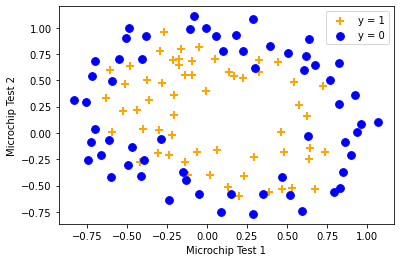

In [5]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [6]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

In [7]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [8]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [9]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [10]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [11]:
def gradientDescent(X, Y, thetas):
  rowNum, colNum = X.shape
  costs = np.zeros((colNum,1))
  lowLimit = -500
  highLimit = 500

  for i in range(rowNum):
    hypothesisVal = np.dot(X[i], thetas)
    hypothesisVal = np.clip(hypothesisVal, lowLimit, highLimit)
    
    sigmoidVal = 1.0/(1.0+np.exp(-hypothesisVal))
    error = sigmoidVal - Y[i]
    # print(X.shape, thetas.shape)
    # break

    for j in range(colNum):
      costs[j][0] = costs[j][0] + error * X[i][j]

  return costs

In [12]:
def optimizeRegularizedTheta(mytheta,myX,myY,alpha,epoch,mylambda=0.):
  m = myY.shape[0]
  cost_per_epoch = []
  thetas = mytheta

  for i in range(epoch):
    cost = gradientDescent(myX, myY, thetas)
    thetas = thetas * (1 - (mylambda / m)) - (alpha/m) * cost
    # print(cost.shape)
    cost_per_epoch.append( computeCost(thetas, myX, myY, mylambda))

  thetas = thetas.reshape((mytheta.shape[0],))
  return thetas, min(cost_per_epoch)

In [13]:
# from scipy import optimize
initial_theta = np.zeros( (XX.shape[1], 1))
# print(initial_theta)
alpha = 0.1
epoch = 100

# def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
#     result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
#     return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y,alpha,epoch)
print(theta)
print(mincost)

[ 0.21980259 -0.03949318  0.17680958 -0.36647819 -0.10509445 -0.18188768
 -0.07526844 -0.04859032 -0.06204244 -0.0630484  -0.29070407 -0.01424949
 -0.09812425 -0.02868105 -0.21291026 -0.10894424 -0.03235489 -0.0221189
 -0.04117423 -0.03887996 -0.13599942 -0.22239972 -0.00401091 -0.05049457
 -0.00193417 -0.05373719 -0.01313744 -0.20704175 -0.11727771 -0.01970546
 -0.01576503 -0.01737718 -0.0100774  -0.03114817 -0.02231062 -0.16341925
 -0.17743324 -0.00273491 -0.0285809  -0.00091388 -0.02164516 -0.00046305
 -0.03550264 -0.00697696 -0.20089995 -0.11597428 -0.01352922 -0.01166042
 -0.0076277  -0.00606408 -0.01104921 -0.00418937 -0.02457545 -0.01282876
 -0.17800224 -0.14871731 -0.00350006 -0.0176873  -0.00056508 -0.01011747
 -0.00079118 -0.01210025  0.00038697 -0.02633894 -0.00410926 -0.20035957]
0.6089396397803091


In [14]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,alpha,epoch,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

[ 0.21980259 -0.03949318  0.17680958 -0.36647819 -0.10509445 -0.18188768
 -0.07526844 -0.04859032 -0.06204244 -0.0630484  -0.29070407 -0.01424949
 -0.09812425 -0.02868105 -0.21291026 -0.10894424 -0.03235489 -0.0221189
 -0.04117423 -0.03887996 -0.13599942 -0.22239972 -0.00401091 -0.05049457
 -0.00193417 -0.05373719 -0.01313744 -0.20704175 -0.11727771 -0.01970546
 -0.01576503 -0.01737718 -0.0100774  -0.03114817 -0.02231062 -0.16341925
 -0.17743324 -0.00273491 -0.0285809  -0.00091388 -0.02164516 -0.00046305
 -0.03550264 -0.00697696 -0.20089995 -0.11597428 -0.01352922 -0.01166042
 -0.0076277  -0.00606408 -0.01104921 -0.00418937 -0.02457545 -0.01282876
 -0.17800224 -0.14871731 -0.00350006 -0.0176873  -0.00056508 -0.01011747
 -0.00079118 -0.01210025  0.00038697 -0.02633894 -0.00410926 -0.20035957] 

Cost :  0.6089396397803091 
 
 
[ 0.13805354 -0.03625328  0.11226772 -0.25510152 -0.07168231 -0.131392
 -0.05746515 -0.03396229 -0.04318991 -0.05019851 -0.20232175 -0.01010205
 -0.06799336 -0.019

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


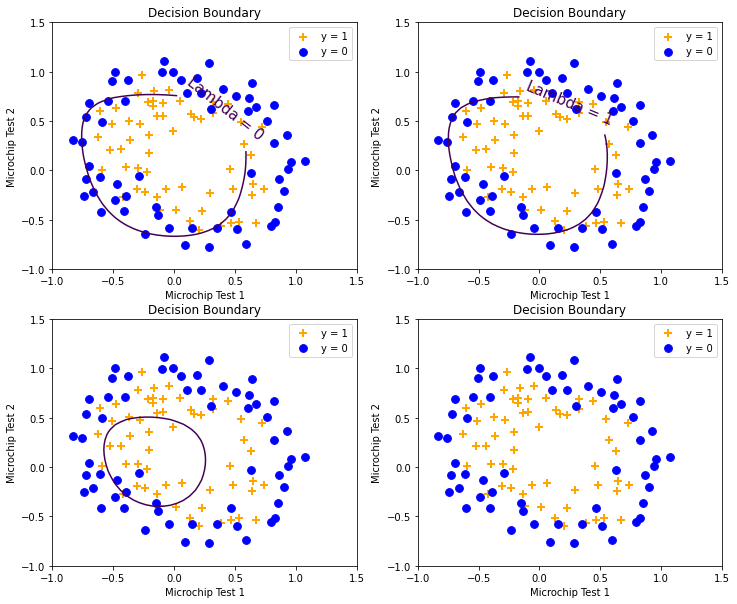

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)